# Introduction

In this project I am visualizing the Netflix stock data with the Python libraries Pandas, Matplotlib and Seaborn. The following data for the year of 2017 is presented and compared:

The distribution of the stock prices for the past year
Netflix's earnings and revenue in the last four quarters
The actual vs. estimated earnings per share for the four quarters in 2017
A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017
I am using the Dow Jones Industrial Average to compare the Netflix stock to the larger stock market 

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Importing the modules that I'll be using in this project

In [56]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from functools import reduce

## Step 2

I'm loading **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspecting the DataFrame using .head().`
`NFLX` is the stock ticker symbol for Netflix, which is why the CSV file is named accordingly


In [57]:
netflix_stocks = pd.read_csv(r"C:\Users\Mel\Downloads\Netflix+Stocks+Capstone\Netflix Stocks Capstone\NFLX.csv")
netflix_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


Same with **DJI.csv** loading into a DataFrame called `dowjones_stocks`. Then, quickly inspecting the DataFrame using .head().`
`DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV is named accordingly
Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [58]:
dowjones_stocks = pd.read_csv(r"C:\Users\Mel\Downloads\Netflix+Stocks+Capstone\Netflix Stocks Capstone\DJI.csv")
dowjones_stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


Same with **NFLX_daily_by_quarter.csv** loading into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspecting the DataFrame using .head().



In [59]:
netflix_stocks_quarterly = pd.read_csv(r"C:\Users\Mel\Downloads\Netflix+Stocks+Capstone\Netflix Stocks Capstone\NFLX_daily_by_quarter.csv")
netflix_stocks_quarterly.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


## Step 3

Each dataset has a column names `Adj Close`, which is documented as adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day. As this naming can get confusing I want to rename this column to 'Price' for all datasets in the following.

 


In [60]:
netflix_stocks.rename(columns={'Adj Close': 'Price'},inplace=True)
netflix_stocks_quarterly.rename(columns={'Adj Close': 'Price'},inplace=True)
dowjones_stocks.rename(columns={'Adj Close': 'Price'},inplace=True)

Let's see how it looks now.

In [61]:
netflix_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,124.959999,143.460007,124.309998,140.710007,140.710007,181772200
1,2017-02-01,141.199997,145.949997,139.050003,142.130005,142.130005,91432000
2,2017-03-01,142.839996,148.289993,138.259995,147.809998,147.809998,110692700
3,2017-04-01,146.699997,153.520004,138.660004,152.199997,152.199997,149769200
4,2017-05-01,151.910004,164.750000,151.610001,163.070007,163.070007,116795800


In [62]:
netflix_stocks_quarterly.head()



,Date,Open,High,Low,Close,Price,Volume,Quarter
0,2017-01-03,124.959999,128.190002,124.309998,127.489998,127.489998,9437900,Q1
1,2017-01-04,127.489998,130.169998,126.550003,129.410004,129.410004,7843600,Q1
2,2017-01-05,129.220001,132.750000,128.899994,131.809998,131.809998,10185500,Q1
3,2017-01-06,132.080002,133.880005,129.809998,131.070007,131.070007,10657900,Q1
4,2017-01-09,131.479996,131.990005,129.889999,130.949997,130.949997,5766900,Q1


In [63]:
dowjones_stocks.head()

,Date,Open,High,Low,Close,Price,Volume
0,2017-01-01,19872.859375,20125.580078,19677.939453,19864.089844,19864.089844,6482450000
1,2017-02-01,19923.810547,20851.330078,19831.089844,20812.240234,20812.240234,6185580000
2,2017-03-01,20957.289063,21169.109375,20412.800781,20663.220703,20663.220703,6941970000
3,2017-04-01,20665.169922,21070.900391,20379.550781,20940.509766,20940.509766,5392630000
4,2017-05-01,20962.730469,21112.320313,20553.449219,21008.650391,21008.650391,6613570000


Much better on all of them.

## Step 4

Now I want to visualize the Netflix quarterly data. 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter.

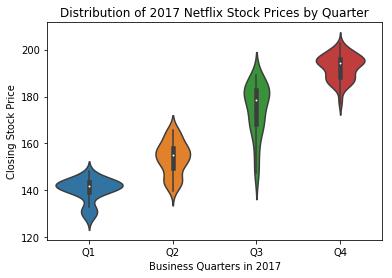

In [64]:
ax = sns.violinplot(data = netflix_stocks_quarterly, x= 'Quarter', y = 'Price')
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax.set_ylabel("Closing Stock Price")
ax.set_xlabel("Business Quarters in 2017")
plt.show()

This visualization show us, that prices for the Netflix stock have been rising throughout all quarters of 2017. 
The price range is from about 120 in the first quarter up to a maximum of a bit over 200 USD in the last quarter. 
The most common price in each quarter seems to have been around 140 for the first, around 150 for the second, around 180 for the first and finally around 190 USD for the last quarter. The third quarter had the widest range of stock prices throughout the year, starting at 140 and spreading up all the way to around 190 USD.

## Step 5

Next, I will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. For this I am using a scatter chart. 

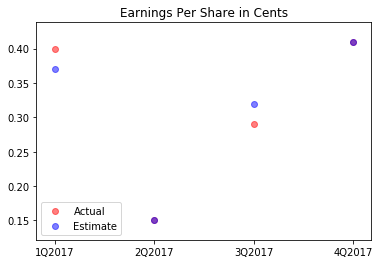

In [65]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
plt.scatter(x_positions, earnings_actual, color='red', alpha = 0.5)
plt.scatter(x_positions, earnings_estimate, color='blue', alpha = 0.5)
plt.legend(["Actual", "Estimate"])
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")
plt.show()

We can see that Yahoo's estimates for the quarters 2 and 4 were very accurate and matched the actual outcome as there is only one dot in the combined color. Good job, Yahoo!


## Step 6

Now I will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. 

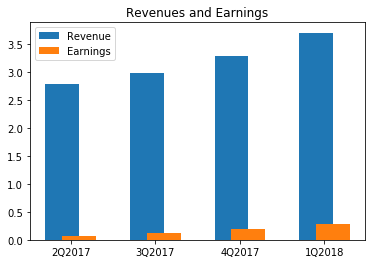

The percentages of Earnings to Revenues throughout the quarters are [2.35 4.35 5.64 7.84]


In [66]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

percentages = [(x/y)*100 for x,y in zip(earnings_by_quarter, revenue_by_quarter)]
better_percentages = np.round(percentages,2)

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.4 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]

# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.4 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

plt.bar(bars1_x, revenue_by_quarter)
plt.bar(bars2_x, earnings_by_quarter)
plt.title('Revenues and Earnings')
plt.legend(labels)
plt.xticks(middle_x, quarter_labels)
plt.show()

print('The percentages of Earnings to Revenues throughout the quarters are '+ str(better_percentages))


As we can see revenues and earnings are consistently trending upwards throughout all quarters of 2017. 
Over time also earnings take up a bigger percentage of revenues. Starting from around 2% in the first quarter up to about 8% in the last quarter this shows a great improvement over the year.

## Step 7

In this last step, I am comparing the Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 


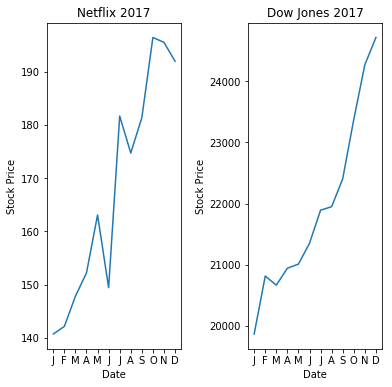

In [100]:
months = ('J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D')

plt.figure(figsize=(6, 6))
# Left plot Netflix
ax = plt.subplot(1,2,1)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'])
plt.title("Netflix 2017" )
ax.set_xticklabels(months)
plt.xlabel("Date")
plt.ylabel('Stock Price')

# Right plot Dow Jones
ax = plt.subplot(1,2,2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'])
ax.set_xticklabels(months)
plt.xlabel("Date")
plt.ylabel('Stock Price')
plt.title('Dow Jones 2017')
plt.subplots_adjust(wspace=.5)
   
plt.show()






As we can see the Netflix stock had a couple falls in 2017, especially in June, August and December. 
The Dow Jones, however, remained relatively stable in its upward trend and less volatile than the Netflix stock.
As the latter represents more companies, this shows the general economic trend for 30 large companies in the US.
The Netflix stock price ranged from 140 to 200 USD in 2017, whereas the Dow Jones spanned a wider range from 20.000 to almost 25.000 in value.